In [561]:
import numpy as np
from array import array
import os
import sys
import ROOT
from ROOT import TVectorD, TMatrix, TMath, TVector3, TGraphErrors, TFile, TTree, gRandom, gPad, gROOT, gVirtualX, kTRUE, kRed, TProfile, gStyle

In [562]:
muon_mass = 0.1056583755 #GeV/c^2

folder = "/home/federico/Documents/Universita/Federico_2020-2021/OxfordCode/Kalman_Garlite/MCgarlite/6planes/"
png = ".png"
filename = folder+"muon_test_ana_kalman.root"
#filename ="test.root"
#garlitetest_nosmear_perfectseed_allhits_elosscorrpred_r5_5.root

file = ROOT.TFile(filename)
t=file.Get("t1s")      


In [563]:
hp0test   = ROOT.TH1D( 'hp0test', 'p0 Residuals Seed', 101, -12, 12 )
hp1test   = ROOT.TH1D( 'hp1test', 'p1 Residuals Seed', 101, -12, 12 )
hp2test   = ROOT.TH1D( 'hp2test', 'p2 Residuals Seed', 101, -12, 12 )
hp3test   = ROOT.TH1D( 'hp3test', 'p3 Residuals Seed', 101, -12, 12 )
hp4test   = ROOT.TH1D( 'hp4test', 'p4 Residuals Seed', 101, -12, 12 )

hpKalman   = ROOT.TH1D( 'hpKalman', 'Kalman p Residuals', 101, -1, 1 )
hpHelix   = ROOT.TH1D( 'hpHelix', 'Helix p Residuals', 101, -1, 1 )
hpHelixNew   = ROOT.TH1D( 'hpHelixNew', 'Helix New p Residuals', 101, -1, 1 )

hinvpKalman   = ROOT.TH1D( 'hinvpKalman', 'Kalman q/pT Residuals', 101, -1, 1 )
hinvpHelix   = ROOT.TH1D( 'hinvpHelix', 'Helix q/pT Residuals', 101, -1, 1 )
hinvpHelixNew   = ROOT.TH1D( 'hinvpHelixNew', 'Helix New q/pT Residuals', 101, -1, 1 )


In [564]:
for iev in range(t.GetEntries()):
    t.GetEntry(iev)
    
    yMC = t.xyz_MC.Y()
    xMC = t.xyz_MC.X()
    sinphiMC = t.sinphi_MC   
    tanlambdaMC = t.tanlambda_MC
    invpTMC = t.invpT_MC
    p_MC = np.sqrt(t.pxyz_MC.Mag2())
    
    ySeed = t.xyz_seed.Y()
    xSeed = t.xyz_seed.X()
    sinphiSeed= t.sinphi_seed
    tanlambdaSeed=t.tanlambda_seed
    invpTSeed = t.invpT_seed
    pSeed = np.sqrt(t.pxyz_seed.Mag2())

    ySeedOld = t.xyz_seed_old.Y()
    xSeedOld = t.xyz_seed_old.X()
    sinphiSeedOld= t.sinphi_seed_old
    tanlambdaSeedOld=t.tanlambda_seed_old
    invpTSeedOld = t.invpT_seed_old
    pSeedOld = np.sqrt(t.pxyz_seed_old.Mag2())

    pKalman=0 
    if(t.status==1) :
        pKalman = np.abs((1/np.cos(np.arctan(t.parvect_bkw.at(t.parvect_bkw.size()-1)[3])))/t.parvect_bkw.at(t.parvect_bkw.size()-1)[4])
        invpTKalman = t.parvect_bkw.at(t.parvect_bkw.size()-1)[4]
    else:
        pKalman = pSeed
        invpTKalman = invpTSeed

    P00 = t.P_seed[0][0]
    P11 = t.P_seed[1][1]
    P22 = t.P_seed[2][2]
    P33 = t.P_seed[3][3]
    P44 = t.P_seed[4][4]
    
    hp0test.Fill((ySeed-yMC)/np.sqrt(P00))
    hp1test.Fill((xSeed-xMC)/np.sqrt(P11))
    hp2test.Fill((sinphiSeed-sinphiMC)/np.sqrt(P22))
    hp3test.Fill((tanlambdaSeed-tanlambdaMC)/np.sqrt(P33))
    hp4test.Fill((invpTSeed-invpTMC)/np.sqrt(P44))

    hpKalman.Fill((pKalman-p_MC)/p_MC)
    hpHelix.Fill((pSeedOld-p_MC)/p_MC)
    hpHelixNew.Fill((pSeed-p_MC)/p_MC)

    hinvpKalman.Fill((invpTKalman-invpTMC)/invpTMC)
    hinvpHelix.Fill((invpTSeedOld-invpTMC)/invpTMC)
    hinvpHelixNew.Fill((invpTSeed-invpTMC)/invpTMC)

Warning in <TCanvas::Constructor>: Deleting canvas with same name: myCanvasName0s
Info in <TCanvas::Print>: png file /home/federico/Documents/Universita/Federico_2020-2021/OxfordCode/Kalman_Garlite/MCgarlite/6planes/helix_Residp0.png has been created
Warning in <TCanvas::Constructor>: Deleting canvas with same name: myCanvasName1s
Info in <TCanvas::Print>: png file /home/federico/Documents/Universita/Federico_2020-2021/OxfordCode/Kalman_Garlite/MCgarlite/6planes/helix_Residp1.png has been created
Warning in <TCanvas::Constructor>: Deleting canvas with same name: myCanvasName2s
Info in <TCanvas::Print>: png file /home/federico/Documents/Universita/Federico_2020-2021/OxfordCode/Kalman_Garlite/MCgarlite/6planes/helix_Residp2.png has been created
Warning in <TCanvas::Constructor>: Deleting canvas with same name: myCanvasName3s
Info in <TCanvas::Print>: png file /home/federico/Documents/Universita/Federico_2020-2021/OxfordCode/Kalman_Garlite/MCgarlite/6planes/helix_Residp3.png has been crea

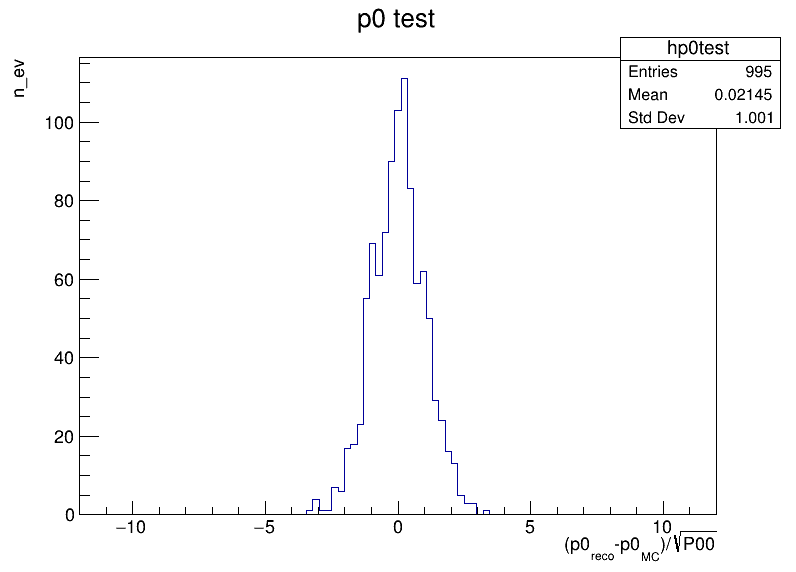

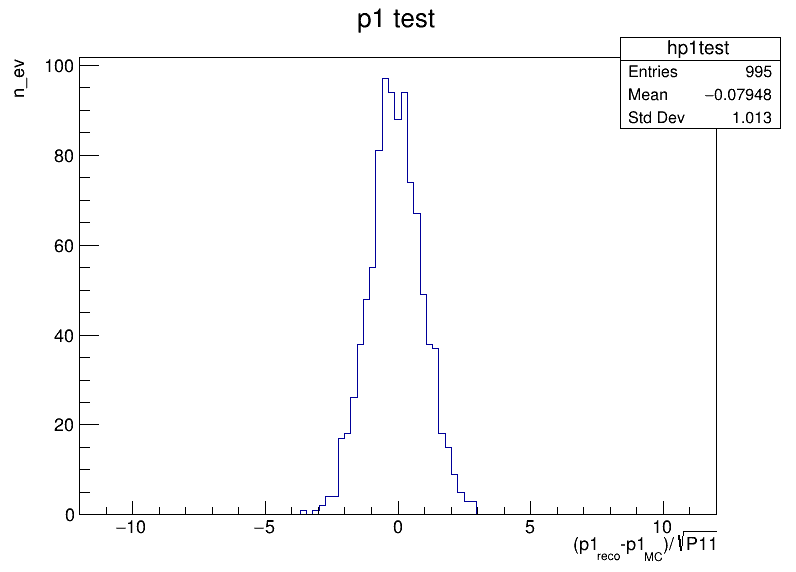

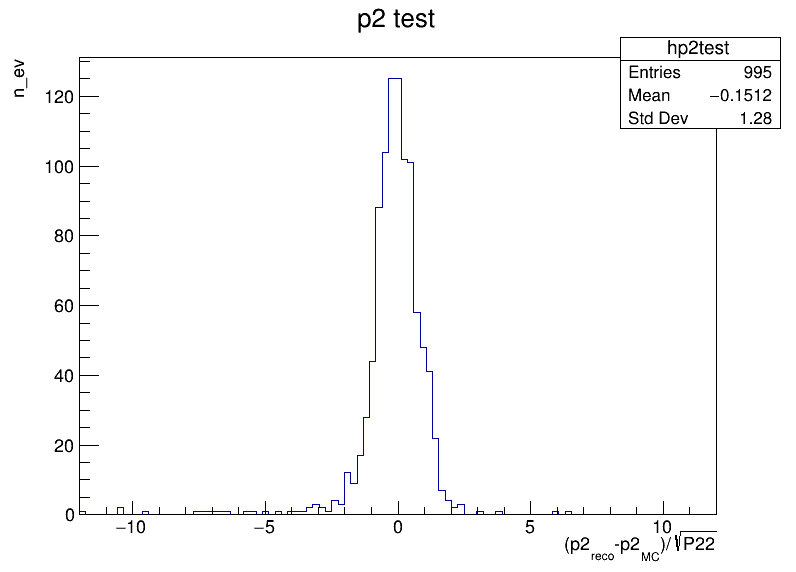

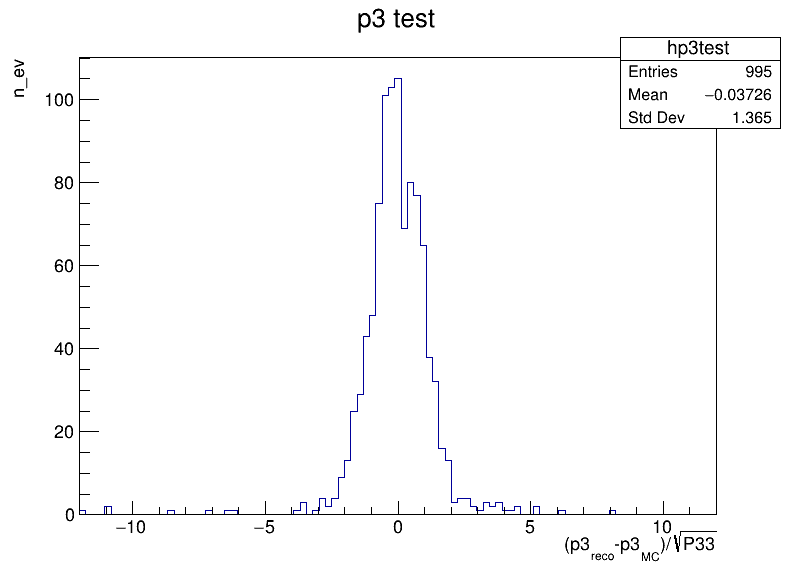

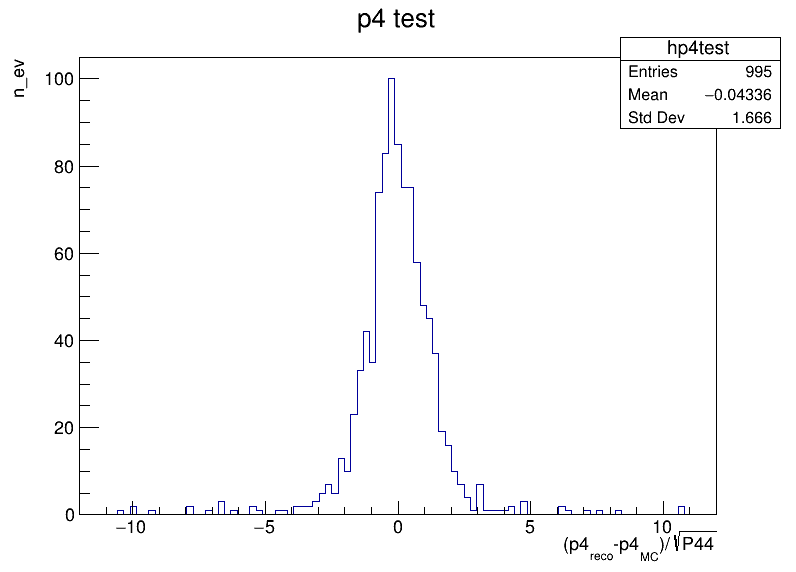

In [565]:
c0s = ROOT.TCanvas("myCanvasName0s","The Canvas Title0s",800,600)
#gPad.SetLogy()
hp0test.SetTitle("p0 test;(p0_{reco}-p0_{MC})/#sqrt{P00};n_ev")
hp0test.Draw()
c0s.Draw()
save=folder+"helix_"+"Residp0"+png
c0s.Print(save)

c1s = ROOT.TCanvas("myCanvasName1s","The Canvas Title1s",800,600)
#gPad.SetLogy()
hp1test.SetTitle("p1 test;(p1_{reco}-p1_{MC})/#sqrt{P11};n_ev")
hp1test.Draw()
c1s.Draw()
save=folder+"helix_"+"Residp1"+png
c1s.Print(save)

c2s = ROOT.TCanvas("myCanvasName2s","The Canvas Title2s",800,600)
#gPad.SetLogy()
hp2test.SetTitle("p2 test;(p2_{reco}-p2_{MC})/#sqrt{P22};n_ev")
hp2test.Draw()
c2s.Draw()
save=folder+"helix_"+"Residp2"+png
c2s.Print(save)

c3s = ROOT.TCanvas("myCanvasName3s","The Canvas Title3s",800,600)
#gPad.SetLogy()
hp3test.SetTitle("p3 test;(p3_{reco}-p3_{MC})/#sqrt{P33};n_ev")
hp3test.Draw()
c3s.Draw()
save=folder+"helix_"+"Residp3"+png
c3s.Print(save)

c4s = ROOT.TCanvas("myCanvasName4s","The Canvas Title4s",800,600)
#gPad.SetLogy()
hp4test.SetTitle("p4 test;(p4_{reco}-p4_{MC})/#sqrt{P44};n_ev")
hp4test.Draw()
c4s.Draw()
save=folder+"helix_"+"Residp4"+png
c4s.Print(save)

 FCN=91.0981 FROM MIGRAD    STATUS=CONVERGED     118 CALLS         119 TOTAL
                     EDM=5.24593e-07    STRATEGY= 1      ERROR MATRIX ACCURATE 
  EXT PARAMETER                                   STEP         FIRST   
  NO.   NAME      VALUE            ERROR          SIZE      DERIVATIVE 
   1  Constant     2.42113e+02   1.08622e+01   3.79807e-02  -2.18266e-05
   2  Mean         2.53430e-03   9.75420e-04   4.56536e-06  -4.22536e-01
   3  Sigma        2.91016e-02   8.68584e-04   1.54933e-05   1.67950e-01
 FCN=70.9652 FROM MIGRAD    STATUS=CONVERGED     132 CALLS         133 TOTAL
                     EDM=6.0542e-07    STRATEGY= 1      ERROR MATRIX ACCURATE 
  EXT PARAMETER                                   STEP         FIRST   
  NO.   NAME      VALUE            ERROR          SIZE      DERIVATIVE 
   1  Constant     3.23662e+02   1.48880e+01   4.41572e-02  -5.05402e-05
   2  Mean        -3.86343e-02   7.49710e-04   3.06915e-06  -8.68133e-01
   3  Sigma        2.24801e-02   7

Warning in <TCanvas::Constructor>: Deleting canvas with same name: myCanvasNamepK
Info in <TCanvas::Print>: png file /home/federico/Documents/Universita/Federico_2020-2021/OxfordCode/Kalman_Garlite/MCgarlite/6planes/Kalman_p_Resid.png has been created
Warning in <TCanvas::Constructor>: Deleting canvas with same name: myCanvasNamepH
Info in <TCanvas::Print>: png file /home/federico/Documents/Universita/Federico_2020-2021/OxfordCode/Kalman_Garlite/MCgarlite/6planes/Helix_p_Resid.png has been created
Warning in <TCanvas::Constructor>: Deleting canvas with same name: myCanvasNamepHn
Info in <TCanvas::Print>: png file /home/federico/Documents/Universita/Federico_2020-2021/OxfordCode/Kalman_Garlite/MCgarlite/6planes/HelixNew_p_Resid.png has been created


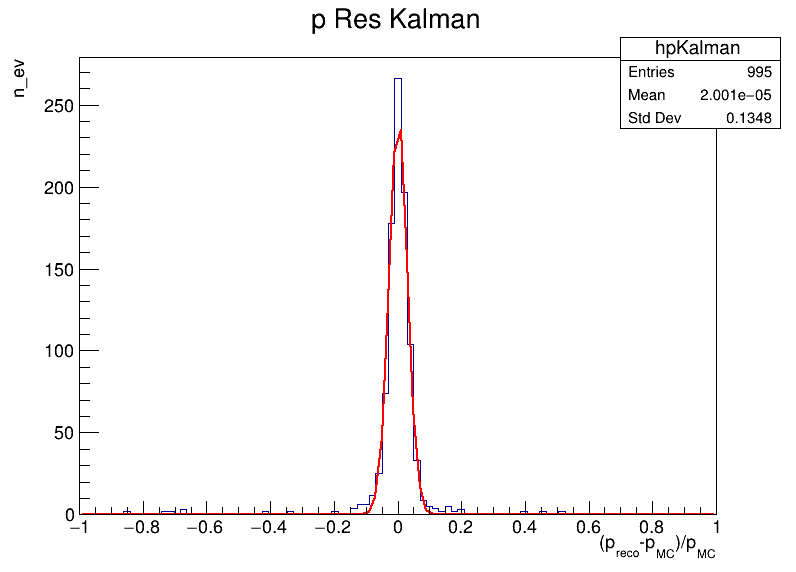

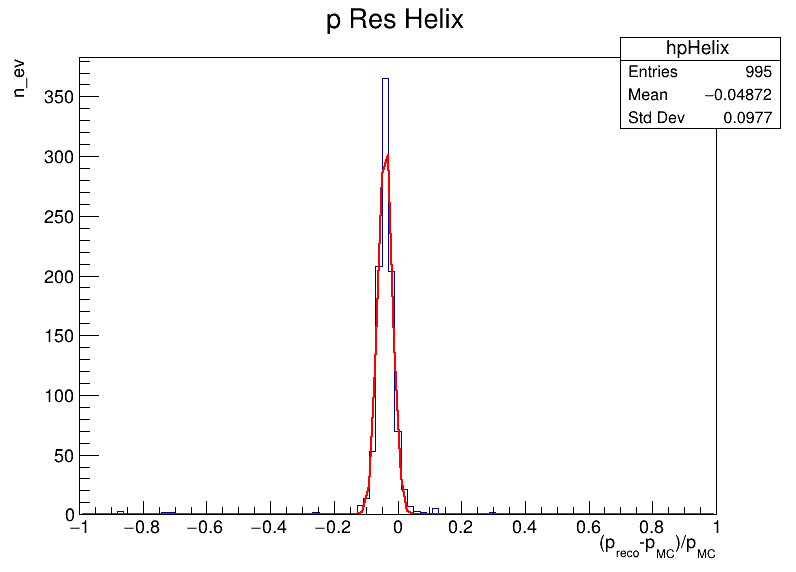

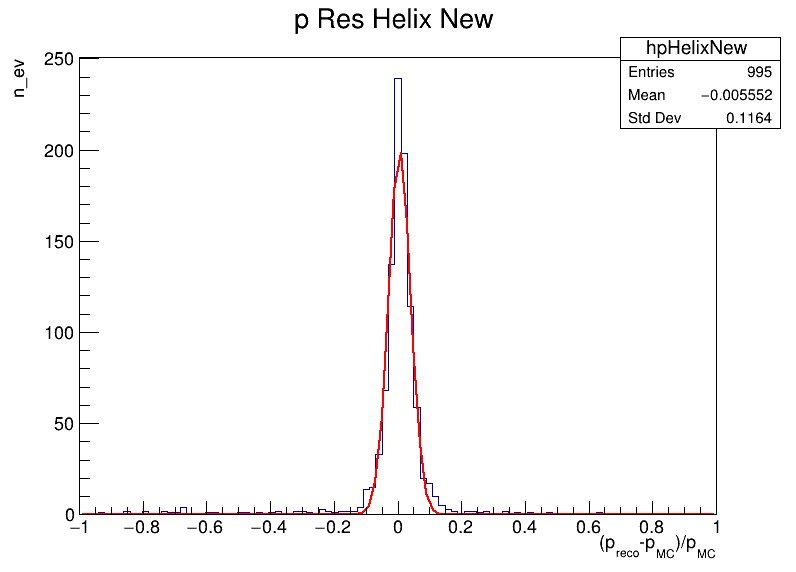

In [569]:
gStyle.SetOptFit(1)
cpK = ROOT.TCanvas("myCanvasNamepK","The Canvas TitlepK",800,600)
#gPad.SetLogy()
hpKalman.SetTitle("p Res Kalman;(p_{reco}-p_{MC})/p_{MC};n_ev")
hpKalman.Fit("gaus")
hpKalman.Draw()
cpK.Draw()
save=folder+"Kalman_p_Resid"+png
cpK.Print(save)

cpH = ROOT.TCanvas("myCanvasNamepH","The Canvas TitlepH",800,600)
#gPad.SetLogy()
hpHelix.SetTitle("p Res Helix;(p_{reco}-p_{MC})/p_{MC};n_ev")
hpHelix.Draw()
hpHelix.Fit("gaus")
cpH.Draw()
save=folder+"Helix_p_Resid"+png
cpH.Print(save)

cpHn = ROOT.TCanvas("myCanvasNamepHn","The Canvas TitlepHn",800,600)
#gPad.SetLogy()
hpHelixNew.SetTitle("p Res Helix New;(p_{reco}-p_{MC})/p_{MC};n_ev")
hpHelixNew.Fit("gaus")
hpHelixNew.Draw()
cpHn.Draw()
save=folder+"HelixNew_p_Resid"+png
cpHn.Print(save)

Warning in <TCanvas::Constructor>: Deleting canvas with same name: myCanvasNameipK
Info in <TCanvas::Print>: png file /home/federico/Documents/Universita/Federico_2020-2021/OxfordCode/Kalman_Garlite/MCgarlite/6planes/Kalman_invp_Resid.png has been created
Warning in <TCanvas::Constructor>: Deleting canvas with same name: myCanvasNamevpH
Info in <TCanvas::Print>: png file /home/federico/Documents/Universita/Federico_2020-2021/OxfordCode/Kalman_Garlite/MCgarlite/6planes/Helix_invp_Resid.png has been created
Warning in <TCanvas::Constructor>: Deleting canvas with same name: myCanvasNameipHn
Info in <TCanvas::Print>: png file /home/federico/Documents/Universita/Federico_2020-2021/OxfordCode/Kalman_Garlite/MCgarlite/6planes/HelixNew_invp_Resid.png has been created


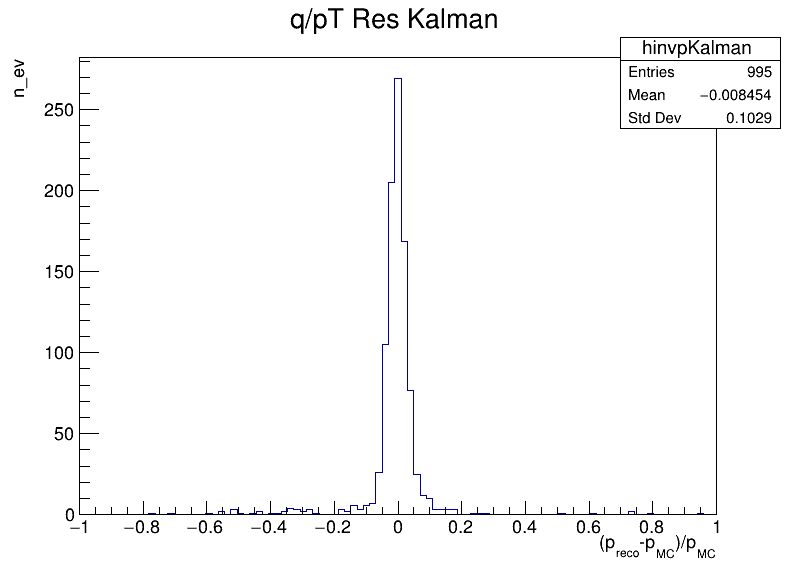

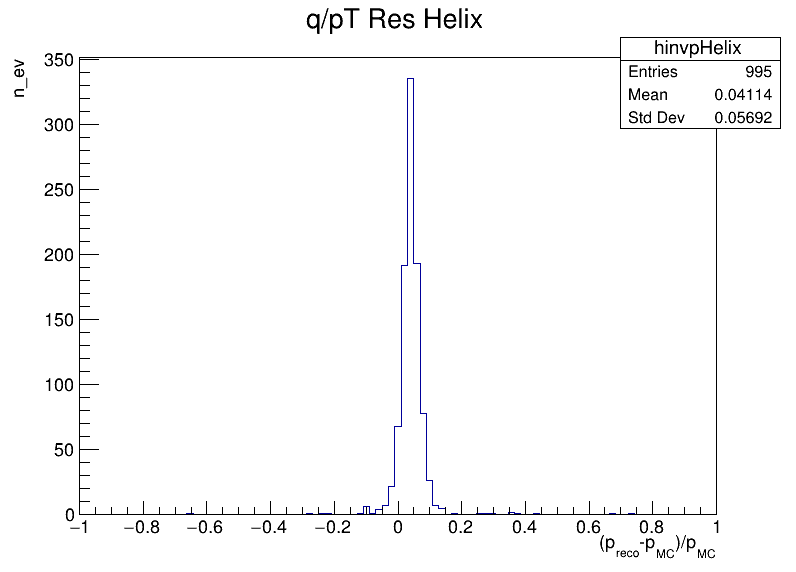

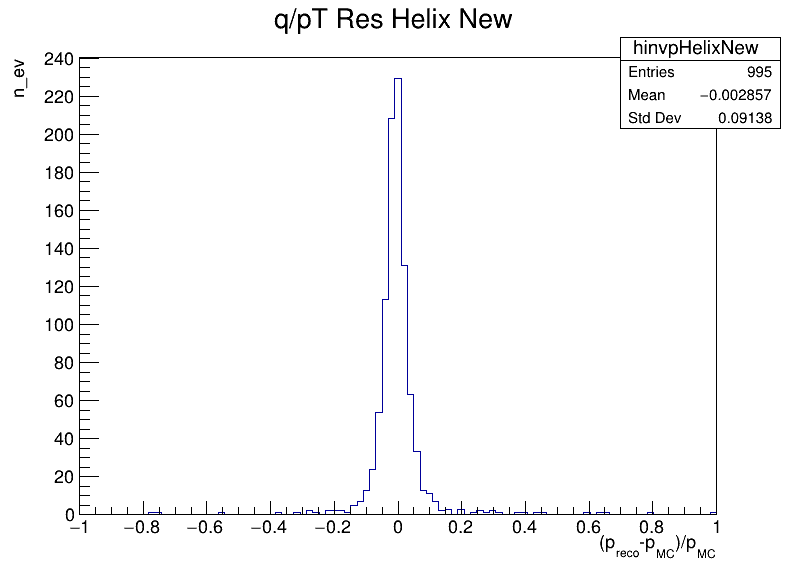

In [567]:
cipK = ROOT.TCanvas("myCanvasNameipK","The Canvas TitlepK",800,600)
#gPad.SetLogy()
hinvpKalman.SetTitle("q/pT Res Kalman;(p_{reco}-p_{MC})/p_{MC};n_ev")
hinvpKalman.Draw()
cipK.Draw()
save=folder+"Kalman_invp_Resid"+png
cipK.Print(save)

cipH = ROOT.TCanvas("myCanvasNamevpH","The Canvas TitlepH",800,600)
#gPad.SetLogy()
hinvpHelix.SetTitle("q/pT Res Helix;(p_{reco}-p_{MC})/p_{MC};n_ev")
hinvpHelix.Draw()
cipH.Draw()
save=folder+"Helix_invp_Resid"+png
cipH.Print(save)

cipHn = ROOT.TCanvas("myCanvasNameipHn","The Canvas TitlepHn",800,600)
#gPad.SetLogy()
hinvpHelixNew.SetTitle("q/pT Res Helix New;(p_{reco}-p_{MC})/p_{MC};n_ev")
hinvpHelixNew.Draw()
cipHn.Draw()
save=folder+"HelixNew_invp_Resid"+png
cipHn.Print(save)